# Normalizing data

April 21, 2021

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()

## 1. Get and look at data

In [35]:
cols = ['fare', 'age', 'survived']

In [97]:
arr = np.load('../data/arr15.npy')

df = pd.DataFrame(arr, columns = cols)

df.head(3)

,fare,age,survived
0,12.350,57.0,0.0
1,20.525,33.0,0.0
2,13.000,39.0,0.0


In [37]:
df.describe().loc[ ['min', 'max'] ]

,fare,age,survived
min,7.7500,2.0,0.0
max,78.2667,57.0,1.0


In [38]:
df.describe().loc[ ['mean', 'std']]

,fare,age,survived
mean,19.778893,29.40000,0.266667
std,17.988783,16.97393,0.457738


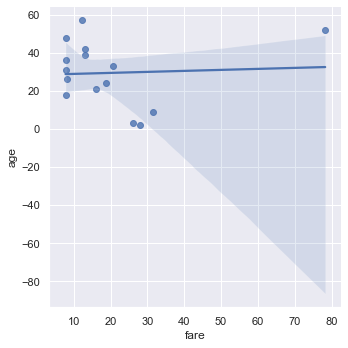

In [56]:
sns.lmplot('fare', 'age', df)

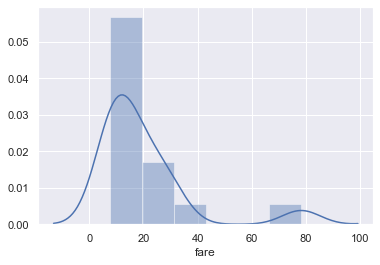

In [58]:
sns.distplot(df['fare'])

## 2. Do with psykit-learn

#### Normalization
- Rescaling data into the range 0 to 1

#### Standardization
- Rescaling data to have mean = 0 and std = 1

### I think normalization makes more sense for KNN, because everything is based on Euclidian distance

In [20]:
from sklearn import preprocessing

In [41]:
arr_sk = preprocessing.normalize(df)

df_sk = pd.DataFrame(arr_sk, columns = cols)

df_sk.head()

,fare,age,survived
0,0.211753,0.977323,0.000000
1,0.528147,0.849153,0.000000
2,0.316228,0.948683,0.000000
3,0.832875,0.553358,0.010642
4,0.992685,0.114541,0.038180


In [42]:
df_sk.tail()

,fare,age,survived
10,0.295764,0.955261,0.000000
11,0.399930,0.916546,0.000000
12,0.961263,0.275631,0.000000
13,0.295607,0.955039,0.022739
14,0.615312,0.787600,0.032817


In [43]:
df_sk.describe().loc[ ['min', 'max'] ]

,fare,age,survived
min,0.161482,0.071501,0.00000
max,0.997441,0.986876,0.03818


In [44]:
df_sk.describe().loc[ ['mean', 'std']]

,fare,age,survived
mean,0.511579,0.742136,0.006958
std,0.305952,0.327234,0.013198


In [46]:
df_sk.survived.describe()

count    15.000000
mean      0.006958
std       0.013198
min       0.000000
25%       0.000000
50%       0.000000
75%       0.005321
max       0.038180
Name: survived, dtype: float64

^^ I'm weirded out that survived, which was 0 or 1, came out as not 0 or 1

#### So, I need to not scale survived

### 2.2 Okay... obviously none of descriptive statistics are relevant

In [30]:
import seaborn as sns

### lm plot -- unscaled data

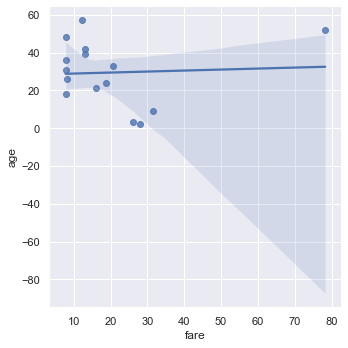

In [59]:
sns.lmplot('fare', 'age', df)

### lmplot -- scaled data

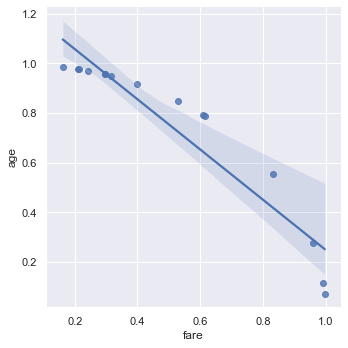

In [60]:
sns.lmplot('fare', 'age', df_sk)

### distplot -- unscaled data: 'fare'

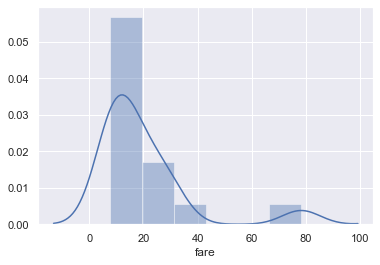

In [63]:
sns.distplot(df['fare'])

### distplot -- scaled data: 'fare'

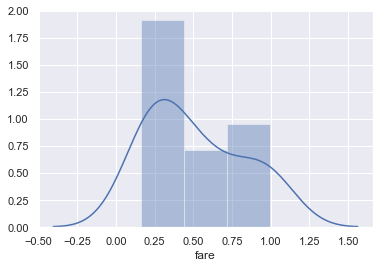

In [62]:
sns.distplot(df_sk['fare'])

### distplot -- unscaled data: 'age'

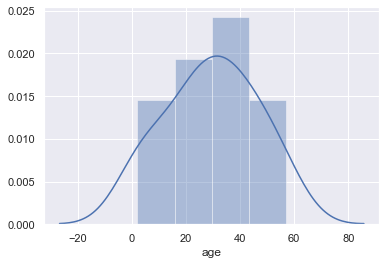

In [65]:
sns.distplot(df['age'])

### distplot -- scaled data: 'age'

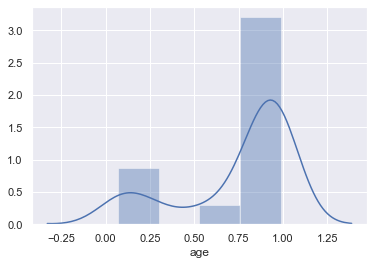

In [66]:
sns.distplot(df_sk['age'])

### It all looks totally different

## 3. Try to build a normalize func

### 3.1 Sandbox with coins

In [70]:
x = [0, 25, 50, 75, 100]

arr2 = np.asarray(x)

arr2

array([  0,  25,  50,  75, 100])

In [71]:
def normalizr(arr):
    mx = arr.max()
    mn = arr.min()
    denom = mx-mn
    
    return (arr-mn)/denom
    

In [72]:
normalizr(arr2)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

## Woot!

#### Make a new array -- dj norm ('dj')

In [81]:
arr_dj = arr
arr_dj[:3]

array([[ 0.06523277, 57.        ,  0.        ],
       [ 0.18116276, 33.        ,  0.        ],
       [ 0.07445045, 39.        ,  0.        ]])

In [82]:
arr_dj[:,0] = normalizr(arr_dj[:,0])
arr_dj[:,1] = normalizr(arr_dj[:,1])

In [83]:
df_dj = pd.DataFrame(arr_dj, columns = cols)

df_dj.head()

,fare,age,survived
0,0.065233,1.000000,0.0
1,0.181163,0.563636,0.0
2,0.074450,0.672727,0.0
3,1.000000,0.909091,1.0
4,0.258804,0.018182,1.0


In [85]:
df_sk.head()

,fare,age,survived
0,0.211753,0.977323,0.000000
1,0.528147,0.849153,0.000000
2,0.316228,0.948683,0.000000
3,0.832875,0.553358,0.010642
4,0.992685,0.114541,0.038180


### ^^ So, I got completely different values than sklearn

### 3.1 Descriptive statistics -- the two methods

In [90]:
df_sk[['fare','age']].describe()

,fare,age
count,15.000000,15.000000
mean,0.511579,0.742136
std,0.305952,0.327234
min,0.161482,0.071501
25%,0.269071,0.670479
50%,0.399930,0.916546
75%,0.724094,0.962702
max,0.997441,0.986876


In [89]:
df_dj[['fare','age']].describe()

,fare,age
count,15.000000,15.000000
mean,0.170582,0.498182
std,0.255100,0.308617
min,0.000000,0.000000
25%,0.003161,0.318182
50%,0.074450,0.527273
75%,0.219983,0.700000
max,1.000000,1.000000


#### Again, completely different
- But both have a max at or close to 1
- It looks like sklearn is more ... less rigid. I have min = 0, max = 1, they're close to 0 and 1.

#### Standard deviation

In [91]:
df_sk[['fare','age']].describe().loc[['std']]

,fare,age
std,0.305952,0.327234


In [92]:
df_dj[['fare','age']].describe().loc[['std']]

,fare,age
std,0.2551,0.308617


#### Mean

In [93]:
df_sk[['fare','age']].describe().loc[['mean']]

,fare,age
mean,0.511579,0.742136


In [94]:
df_dj[['fare','age']].describe().loc[['mean']]

,fare,age
mean,0.170582,0.498182


#### How can these be wildly different?!?!

In [98]:
df[['fare','age']].describe().loc[['mean']]

,fare,age
mean,19.778893,29.4


### 3.2 Let's standardize the values to really compare them -- i.e., get Z scores

z score = (x - mean)/std

In [115]:
df.fare.std()

17.988782934868315

#### Original df -- 'fare'

In [114]:
df_z = ( df['fare'] - df['fare'].mean() ) / df.fare.std()

df_z

0    -0.412974
1     0.041476
2    -0.376840
3     3.251349
4     0.345833
5     0.451454
6    -0.204510
7    -0.660584
8    -0.662896
9    -0.668689
10   -0.652011
11   -0.662896
12    0.645325
13   -0.376840
14   -0.057196
Name: fare, dtype: float64

#### sklearn df -- 'fare'

In [116]:
df_sk_z = ( df_sk.fare - df_sk.fare.mean() ) / df_sk.fare.std()

df_sk_z

0    -0.979976
1     0.054152
2    -0.638503
3     1.050151
4     1.572484
5     1.588029
6     0.316560
7    -0.971863
8    -1.144288
9    -0.879365
10   -0.705390
11   -0.364925
12    1.469785
13   -0.705901
14    0.339050
Name: fare, dtype: float64

#### DJ df -- 'fare

In [117]:
df_dj_z = ( df_dj.fare - df_dj.fare.mean()) / df_dj.fare.std()

df_dj_z

0    -0.412974
1     0.041476
2    -0.376840
3     3.251349
4     0.345833
5     0.451454
6    -0.204510
7    -0.660584
8    -0.662896
9    -0.668689
10   -0.652011
11   -0.662896
12    0.645325
13   -0.376840
14   -0.057196
Name: fare, dtype: float64

In [127]:
df_all_z = pd.DataFrame(df_z, columns=['df'])

df_all_z['original_df'] = df_z
df_all_z['dj'] = df_dj_z
df_all_z['sk'] = df_sk_z

In [138]:
df_all_z[['original_df', 'dj']]

,original_df,dj
0,-0.412974,-0.412974
1,0.041476,0.041476
2,-0.376840,-0.376840
3,3.251349,3.251349
4,0.345833,0.345833
5,0.451454,0.451454
6,-0.204510,-0.204510
7,-0.660584,-0.660584
8,-0.662896,-0.662896
9,-0.668689,-0.668689


### Okay, clearly 'dj' has the same z scores -- this is good

## 3.3 Visualization

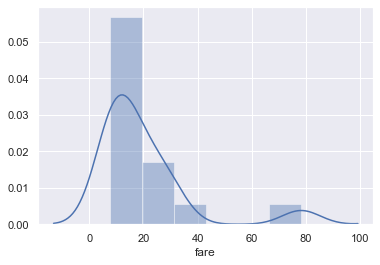

In [140]:
sns.distplot(df['fare'])

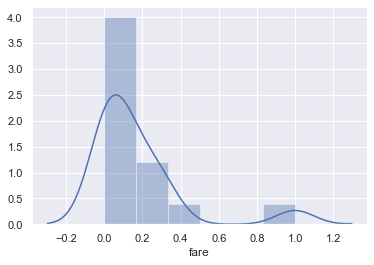

In [142]:
sns.distplot(df_dj['fare'])

#### Woot! 

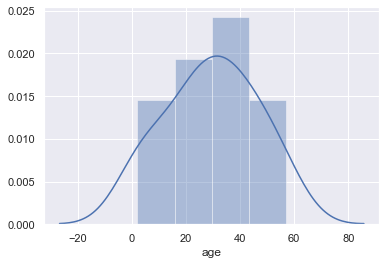

In [143]:
sns.distplot(df['age'])

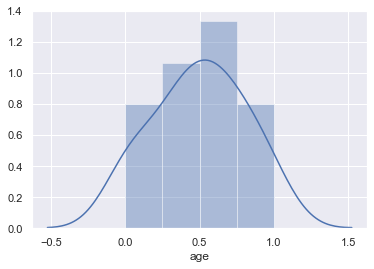

In [144]:
sns.distplot(df_dj['age'])

## Woot!